# Predicting Housing Prices
Data: https://www.kaggle.com/anthonypino/melbourne-housing-market

Predicting the Housing prices of the Melbourne market

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the Data

In [2]:
path = 'csv/housing/Melbourne_housing_FULL.csv'
data = pd.read_csv(path)
df = pd.DataFrame(data)
print(df.shape)
print(df.columns)
df.head()

(34857, 21)
Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


# General Data Cleaning

In [3]:
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [4]:
df = df.drop(['Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Address', 'SellerG', 'Date'], axis=1)
df = df.dropna()
df.shape

(20993, 12)

In [5]:
df.head()

,Suburb,Rooms,Type,Price,Method,Distance,Postcode,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,2,h,1480000.0,S,2.5,3067.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,2.5,3067.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,2.5,3067.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,3,h,850000.0,PI,2.5,3067.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,4,h,1600000.0,VB,2.5,3067.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0


# Exploring Data

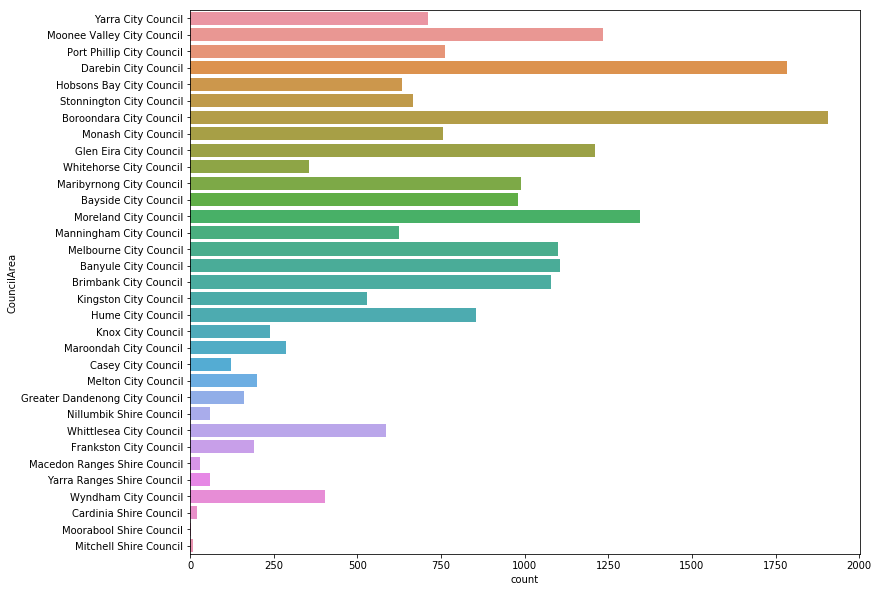

In [6]:
f, ax = plt.subplots(figsize=(12, 10))

sns.countplot(y=df.CouncilArea)
plt.show()

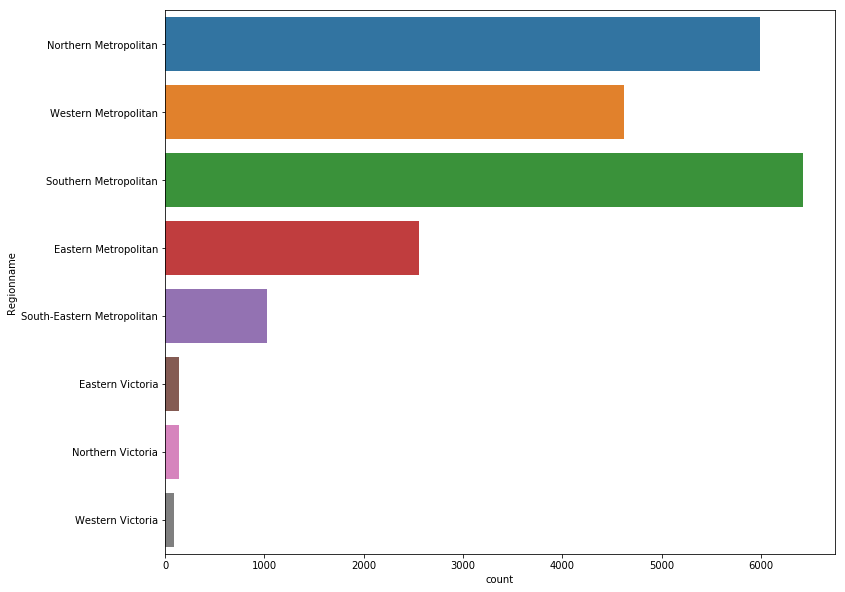

In [7]:
f, ax = plt.subplots(figsize=(12, 10))

sns.countplot(y=df.Regionname)
plt.show()

### Checking for Outliers

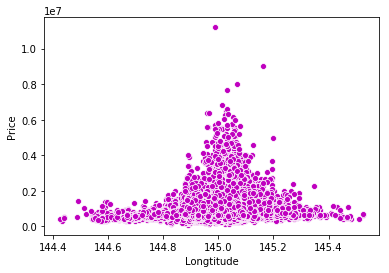

In [8]:
sns.scatterplot(x='Longtitude', y='Price', data=df, color='m')
plt.show()

### Removing Outliers

In [9]:
def remove_outlier(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1
    lower_bound  = q1 - (1.5  * iqr)
    upper_bound = q3 + (1.5 * iqr)

    out_df = df.loc[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return out_df
print(df.shape)
df = remove_outlier(df, 'Price')
print(df.shape)
df.head()

(20993, 12)
(20021, 12)


,Suburb,Rooms,Type,Price,Method,Distance,Postcode,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,2,h,1480000.0,S,2.5,3067.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,2.5,3067.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,2.5,3067.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,3,h,850000.0,PI,2.5,3067.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,4,h,1600000.0,VB,2.5,3067.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0


### Checking Graph After Outlier Removal

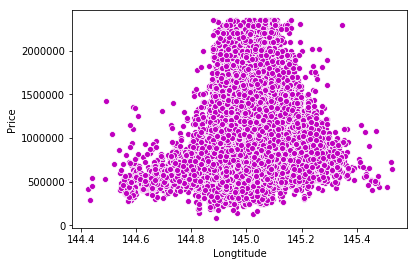

In [10]:
sns.scatterplot(x='Longtitude', y='Price', data=df, color='m')
plt.show()

### Creating Categorical Features

In [11]:
df['SuburbCat'] = df.Suburb.astype('category').cat.codes
df['TypeCat'] = df.Type.astype('category').cat.codes
df['MethodCat'] = df.Method.astype('category').cat.codes
df['RegionCat'] = df.Regionname.astype('category').cat.codes
df['CouncilCat'] = df.CouncilArea.astype('category').cat.codes

### Feature Selection

In [12]:
df.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'Distance', 'Postcode',
       'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount',
       'SuburbCat', 'TypeCat', 'MethodCat', 'RegionCat', 'CouncilCat'],
      dtype='object')

### Creating Variables for Training and Testing

In [13]:
cols = ['Rooms', 'Price', 'Distance', 'Postcode', 'Lattitude', 'Longtitude', 'Propertycount',
        'SuburbCat', 'TypeCat', 'MethodCat', 'RegionCat', 'CouncilCat']

test_df = df.loc[:, cols]

X = test_df.drop('Price', axis=1)
y = test_df['Price']

### Checking Correlation

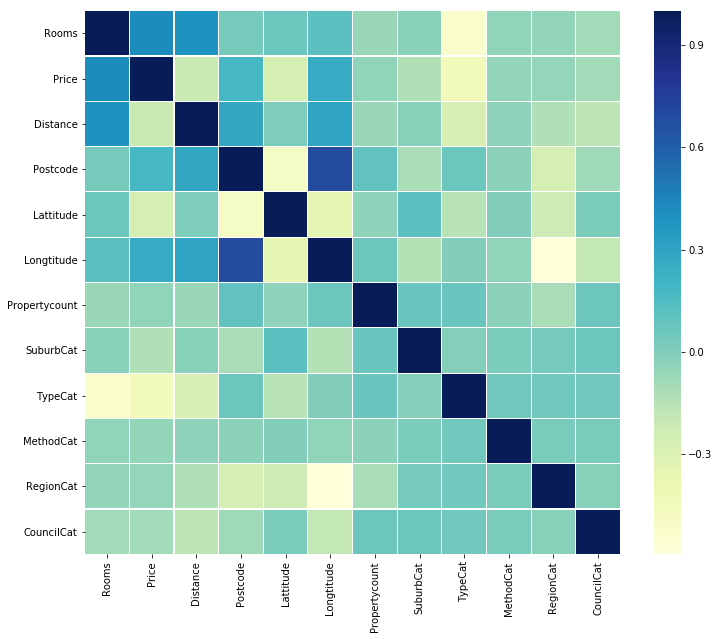

In [14]:
corrmat = test_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)
plt.show()

### Creating PCA and K Best Train/Test Sets.

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn import metrics

scaler = StandardScaler()
X = scaler.fit_transform(X.astype('float64'))

'''
These functions will be called to reduce the dimensionality of the data. Each will be put into
their own variable to test against one another.
'''
def apply_pca(X):
    scaler = StandardScaler()
    pca = PCA(n_components=9)
    X = pca.fit_transform(X)
    
    print('PCA Explained Variance: {}'.format(pca.explained_variance_ratio_.sum()))
    return X

def apply_kbest(X, y):
    kbest = SelectKBest(k=9)
    X = kbest.fit_transform(X, y)
    return X

X_pca = apply_pca(X)
X_k = apply_kbest(X, y)


#Creating test sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.33, random_state=42)
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_k, y, test_size=0.33, random_state=42)

PCA Explained Variance: 0.9444930785018105


In [16]:
def eval_model(model_pca, model_k):
    '''
    The purpose of this function will serve to train the models and return a list 
    that contains the score and prediction values. That will later be used for assessment.
    '''
    pca = []
    model_pca.fit(X_train_pca, y_train_pca)
    pca.append(model_pca.score(X_test_pca, y_test_pca))
    pca.append(model_pca.predict(X_test_pca))
    
    k = []
    model_k.fit(X_train_k, y_train_k)
    k.append(model_k.score(X_test_k, y_test_k))
    k.append(model_k.predict(X_test_k))
    
    return pca, k

# Creating Models
Will be making use of:
- LightGBM
- Decision Tree
- Random Forest
- K Nearest Neighbors
- Ridge Regression
- Logistic Regression
- Stochastic Gradient Descent

In [17]:
import lightgbm as lgb
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV


gbm_pca = lgb.LGBMRegressor(boosting_type='gbdt', objective='regression', learning_rate=0.5, feature_fration=0.9, bagging_fraction=0.9,
                            bagging_freq=5, device='gpu', verbose=0)

gbm_k = lgb.LGBMRegressor(boosting_type='gbdt', objective='regression', learning_rate=0.5, feature_fration=0.9, bagging_fraction=0.9,
                            bagging_freq=5, device='gpu', verbose=0)

rfc_pca = RandomForestRegressor(n_estimators=500, max_features='sqrt', min_samples_split=2, criterion='mse', max_depth=9)
rfc_k = RandomForestRegressor(n_estimators=500, max_features='sqrt', min_samples_split=2, criterion='mse', max_depth=9)

knn_pca = KNeighborsRegressor(n_jobs=-1)
knn_k = KNeighborsRegressor(n_jobs=-1)

rdg_pca = Ridge(alpha=1.0, solver='saga')
rdg_k = Ridge(alpha=1.0, solver='saga')

log_pca = LogisticRegression(solver='lbfgs', multi_class='ovr')
log_k = LogisticRegression(solver='lbfgs', multi_class='ovr')

sgd_pca = SGDRegressor(loss='squared_loss', max_iter=500, tol=1e-3)
sgd_k = SGDRegressor(loss='squared_loss', max_iter=500, tol=1e-3)


#----------Grid Search CV---------#

dtr_params = parameters = {'criterion':['mse'], 
              'min_samples_split':[2,5], 
              'max_depth':[9,12],
             }

dtr_pca = DecisionTreeRegressor()
dtr_k = DecisionTreeRegressor()

dtr_gsearch_pca = GridSearchCV(dtr_pca, dtr_params, cv=5)
dtr_gsearch_pca.fit(X_train_pca, y_train_pca)

dtr_gsearch_k = GridSearchCV(dtr_k, dtr_params, cv=5)
dtr_gsearch_k.fit(X_train_k, y_train_k)

dtr_pca_best = dtr_gsearch_pca.best_estimator_
dtr_k_best = dtr_gsearch_k.best_estimator_

### Training models and returning a list that contains the score and predictions

In [18]:
gbm_eval = eval_model(gbm_pca, gbm_k)
dtr_eval = eval_model(dtr_pca_best, dtr_k_best)
rfc_eval = eval_model(rfc_pca, rfc_k)
knn_eval = eval_model(knn_pca, knn_k)
rdg_eval = eval_model(rdg_pca, rdg_k)
log_eval = eval_model(log_pca, log_k)
sgd_eval = eval_model(sgd_pca, sgd_k)

# PCA RMSE Scores

In [19]:
from sklearn.metrics import mean_squared_error

gbm_mse = mean_squared_error(y_test_pca, gbm_eval[0][1])
dtr_mse = mean_squared_error(y_test_pca, dtr_eval[0][1])
rfc_mse = mean_squared_error(y_test_pca, rfc_eval[0][1])
knn_mse = mean_squared_error(y_test_pca, knn_eval[0][1])
rdg_mse = mean_squared_error(y_test_pca, rdg_eval[0][1])
log_mse = mean_squared_error(y_test_pca, log_eval[0][1])
sgd_mse = mean_squared_error(y_test_pca, sgd_eval[0][1])


print('Light GBM Score: {:.3f}'.format(np.sqrt(gbm_mse)))
print('Decision Tree Score: {:.3f}'.format(np.sqrt(dtr_mse)))
print('Random Forest Score: {:.3f}'.format(np.sqrt(rfc_mse)))
print('K Nearest Neighbor Score: {:.3f}'.format(np.sqrt(knn_mse)))
print('Ridge Regression Score: {:.3f}'.format(np.sqrt(rdg_mse)))
print('Logistic Regression Score: {:.3f}'.format(np.sqrt(log_mse)))
print('Stochastic Gradient Descent Score: {:.3f}'.format(np.sqrt(sgd_mse)))

Light GBM Score: 243316.590
Decision Tree Score: 269464.700
Random Forest Score: 246486.031
K Nearest Neighbor Score: 238652.920
Ridge Regression Score: 343810.287
Logistic Regression Score: 345812.868
Stochastic Gradient Descent Score: 344221.069


# K Best RMSE Scores

In [20]:
gbm_mse_k = mean_squared_error(y_test_k, gbm_eval[1][1])
dtr_mse_k = mean_squared_error(y_test_k, dtr_eval[1][1])
rfc_mse_k = mean_squared_error(y_test_k, rfc_eval[1][1])
knn_mse_k = mean_squared_error(y_test_k, knn_eval[1][1])
rdg_mse_k = mean_squared_error(y_test_k, rdg_eval[1][1])
log_mse_k = mean_squared_error(y_test_k, log_eval[1][1])
sgd_mse_k = mean_squared_error(y_test_k, sgd_eval[1][1])


print('Light GBM Score: {:.3f}'.format(np.sqrt(gbm_mse_k)))
print('Decision Tree Score: {:.3f}'.format(np.sqrt(dtr_mse_k)))
print('Random Forest Score: {:.3f}'.format(np.sqrt(rfc_mse_k)))
print('K Nearest Neighbor Score: {:.3f}'.format(np.sqrt(knn_mse_k)))
print('Ridge Regression Score: {:.3f}'.format(np.sqrt(rdg_mse_k)))
print('Logistic Regression Score: {:.3f}'.format(np.sqrt(log_mse_k)))
print('Stochastic Gradient Descent Score: {:.3f}'.format(np.sqrt(sgd_mse_k)))

Light GBM Score: 217577.801
Decision Tree Score: 241564.252
Random Forest Score: 224184.696
K Nearest Neighbor Score: 229280.865
Ridge Regression Score: 295010.727
Logistic Regression Score: 312620.965
Stochastic Gradient Descent Score: 295579.182


# PCA Cross Validation

Unable to get cross validation to run properly. I kept getting this error. 

- 'Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)'

In [ ]:
from sklearn.model_selection import cross_val_score

def cross_val(model, pca):
    if pca == True:
        cv_score = cross_val_score(model, X, y, cv=5, scoring='r2', n_jobs=-1)
        return cv_score 
    else:
        cv_score = cross_val_score(model, X, y, cv=5, scoring='r2', n_jobs=-1)
        return cv_score 
        

gbm_cv_pca = cross_val(gbm_pca, True)
dtr_cv_pca = cross_val(dtr_pca_best, True)
rfc_cv_pca = cross_val(rfc_pca, True)
knn_cv_pca = cross_val(knn_pca, True)
rdg_cv_pca = cross_val(rdg_pca, True)
log_cv_pca = cross_val(log_pca, True)
sgd_cv_pca = cross_val(sgd_pca, True)


print('Light GBM Score: {:.3f}\n{}\n'.format(gbm_cv_pca.mean(), gbm_cv_pca))
print('Decision Tree Score: {:.3f}\n'.format(dtr_cv_pca.mean(), dtr_cv_pca))
print('Random Forest Score: {:.3f}\n'.format(rfc_cv_pca.mean(), rfc_cv_pca))
print('K Nearest Neighbor Score: {:.3f}\n'.format(knn_cv_pca.mean(), knn_cv_pca))
print('Ridge Regression Score: {:.3f}\n'.format(rdg_cv_pca.mean(), rdg_cv_pca))
print('Logistic Regression Score: {:.3f}\n'.format(log_cv_pca.mean(), log_cv_pca))
print('Stochastic Gradient Descent Score: {:.3f}\n'.format(log_cv_pca.mean(), log_cv_pca))

# K Best Cross Validation

For some reason I kept getting this error. 'Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)'

In [ ]:
gbm_cv_k = cross_val(gbm_k, False)
dtr_cv_k = cross_val(dtr_k_best, False)
rfc_cv_k = cross_val(rfc_k, False)
knn_cv_k = cross_val(knn_k, False)
rdg_cv_k = cross_val(rdg_k, False)
log_cv_k = cross_val(log_k, False)
sgd_cv_k = cross_val(sgd_k, False)


print('Light GBM Score: {:.3f}\n{}'.format(gbm_cv_k.mean(), gbm_cv_k))
print('Decision Tree Score: {:.3f}'.format(dtr_cv_k.mean(), dtr_cv_k))
print('Random Forest Score: {:.3f}'.format(rfc_cv_k.mean(), rfc_cv_k))
print('K Nearest Neighbor Score: {:.3f}'.format(knn_cv_k.mean(), knn_cv_k))
print('Ridge Regression Score: {:.3f}'.format(rdg_cv_k.mean(), rdg_cv_k))
print('Logistic Regression Score: {:.3f}'.format(log_cv_k.mean(), log_cv_k))
print('Stochastic Gradient Descent Score: {:.3f}'.format(log_cv_k.mean(), log_cv_k))

# PCA R^2 Score

In [21]:
from sklearn.metrics import r2_score

gbm_r = r2_score(y_test_pca, gbm_eval[0][1])
dtr_r = r2_score(y_test_pca, dtr_eval[0][1])
rfc_r = r2_score(y_test_pca, rfc_eval[0][1])
knn_r = r2_score(y_test_pca, knn_eval[0][1])
rdg_r = r2_score(y_test_pca, rdg_eval[0][1])
log_r = r2_score(y_test_pca, log_eval[0][1])
sgd_r = r2_score(y_test_pca, sgd_eval[0][1])


print('Light GBM Score: {:.3f}'.format(gbm_r))
print('Decision Tree Score: {:.3f}'.format(dtr_r))
print('Random Forest Score: {:.3f}'.format(rfc_r))
print('K Nearest Neighbor Score: {:.3f}'.format(knn_r))
print('Ridge Regression Score: {:.3f}'.format(rdg_r))
print('Logistic Regression Score: {:.3f}'.format(log_r))
print('Stochastic Gradient Descent Score: {:.3f}'.format(sgd_r))

Light GBM Score: 0.713
Decision Tree Score: 0.648
Random Forest Score: 0.705
K Nearest Neighbor Score: 0.724
Ridge Regression Score: 0.426
Logistic Regression Score: 0.420
Stochastic Gradient Descent Score: 0.425


# K Best R^2 Score

In [22]:
gbm_r = r2_score(y_test_k, gbm_eval[0][1])
dtr_r = r2_score(y_test_k, dtr_eval[0][1])
rfc_r = r2_score(y_test_k, rfc_eval[0][1])
knn_r = r2_score(y_test_k, knn_eval[0][1])
rdg_r = r2_score(y_test_k, rdg_eval[0][1])
log_r = r2_score(y_test_k, log_eval[0][1])
sgd_r = r2_score(y_test_k, sgd_eval[0][1])


print('Light GBM Score: {:.3f}'.format(gbm_r))
print('Decision Tree Score: {:.3f}'.format(dtr_r))
print('Random Forest Score: {:.3f}'.format(rfc_r))
print('K Nearest Neighbor Score: {:.3f}'.format(knn_r))
print('Ridge Regression Score: {:.3f}'.format(rdg_r))
print('Logistic Regression Score: {:.3f}'.format(log_r))
print('Stochastic Gradient Descent Score: {:.3f}'.format(sgd_r))

Light GBM Score: 0.713
Decision Tree Score: 0.648
Random Forest Score: 0.705
K Nearest Neighbor Score: 0.724
Ridge Regression Score: 0.426
Logistic Regression Score: 0.420
Stochastic Gradient Descent Score: 0.425


# Conclusion

The three strongest models in order are LightGBM, Random Forest, K Nearest Neighbors. It makes a lot of sense that the K Nearest Neighbor model performed as well as it did. Houses with similar prices will have similar feature values. While Random Forest and Gradient Boosting do a great job of increasing their accuracy with large data sets with minimal effort. 